# Ensemble learning

In deze oefening ga je verder oefenen op het gebruik van Python en een aantal data packages.
Los onderstaande vragen op door code te schrijven in de code cellen.
Zorg ervoor dat deze cellen vanboven naar beneden in het document uitgevoerd kunnen worden (Cell > Run All).
Verwijder ook de output voor het indienen om de bestandsgrootte te beperken (Cell > All Output > Clear). 

Vergeet ook niet te beantwoorden op de vragen over je oplossingen!

De deadline voor deze opgave is: 14 december 23:59.

## Opgave

De afgelopen jaren komt de term "Fake News" steeds meer en meer aan bod.
In deze oefening gaan we op zoek naar een classifier die artikels over de burgeroorlog in Syrie gaat aanduiden als "Echt" of "Fake" news.
Om deze classificatie uit te voeren wordt er gebruik gemaakt van [deze dataset](https://www.kaggle.com/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war).
Deze dataset bevat verscheidene artikels die gehaald zijn van verscheidene fact-checking website over de oorlog.
De labels in deze dataset zijn 0 voor fake-news en 1 voor geloofwaardige artikels.

In [12]:
# plaats alle imports hier
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns

Download deze dataset en laad ze in.

In [3]:
od.download("https://www.kaggle.com/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jensbaetensodisee
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 458k/458k [00:00<00:00, 4.19MB/s]

Zet de date kolom om naar een datetime en zorg ervoor dat deze kolom de index is.

In [10]:
df = pd.read_csv(".\\a-fake-news-dataset-around-the-syrian-war\\FA-KES-Dataset.csv")
df.date = pd.to_datetime(df.date, format="%m/%d/%Y")
df.set_index("date", inplace=True)
display(df.head())
df.info()

,unit_id,article_title,article_content,source,location,labels
date,,,,,,
2017-04-05,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,idlib,0
2017-04-07,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,homs,0
2017-04-16,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0
2017-04-19,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0
2016-07-10,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2017-04-05 to 2017-04-04
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   location         804 non-null    object
 5   labels           804 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 44.0+ KB


## Explore data analysis

Beantwoord de volgende vragen op deze dataset:
* Welke bronnen zijn het betrouwbaarst? Toon hiervoor een bar-plot met het percentage fake news per bron.
* Toon de evolutie van het aantal fake-news artikels per maand aan de hand van een lineplot? Tip: [resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html). Doe dit ook voor het percentage fake-news artikels. Dit mag op 1 plot gecombineerd worden of op 2 aparte figuren.
* Is de dataset gebalanceerd? Waarom is dit belangrijk om te bepalen? Toon dit aan de hand van een bar-plot.

source
ahram            0.503356
alalam           0.455556
alaraby          0.428571
arabiya          0.545455
asharqalawsat    0.363636
dailysabah       0.459459
etilaf           0.565217
jordantimes      0.285714
manar            0.485714
nna              0.769231
reuters          0.538462
sana             0.517857
sputnik          0.301887
tass             0.600000
trt              0.452381
dtype: float64

<AxesSubplot:xlabel='source'>

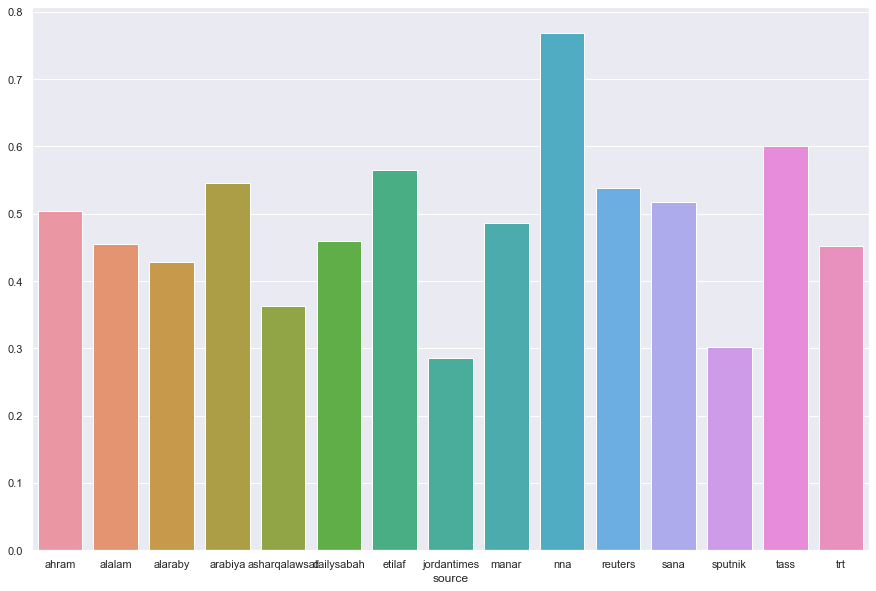

In [13]:
# Aantal onderwerpen 
total_artikels = df.groupby("source").size()
fake_artikels = df[df.labels == 0].groupby("source").size()
percentage = fake_artikels / total_artikels
display(percentage)
sns.set(rc={"figure.figsize": (15,10)})
sns.barplot(x = percentage.index, y = percentage.values)

date
2011-02-28    1
2011-03-31    0
2011-04-30    0
2011-05-31    0
2011-06-30    0
             ..
2018-03-31    0
2018-04-30    0
2018-05-31    0
2018-06-30    0
2018-07-31    1
Freq: M, Length: 90, dtype: int64

<AxesSubplot:xlabel='date'>

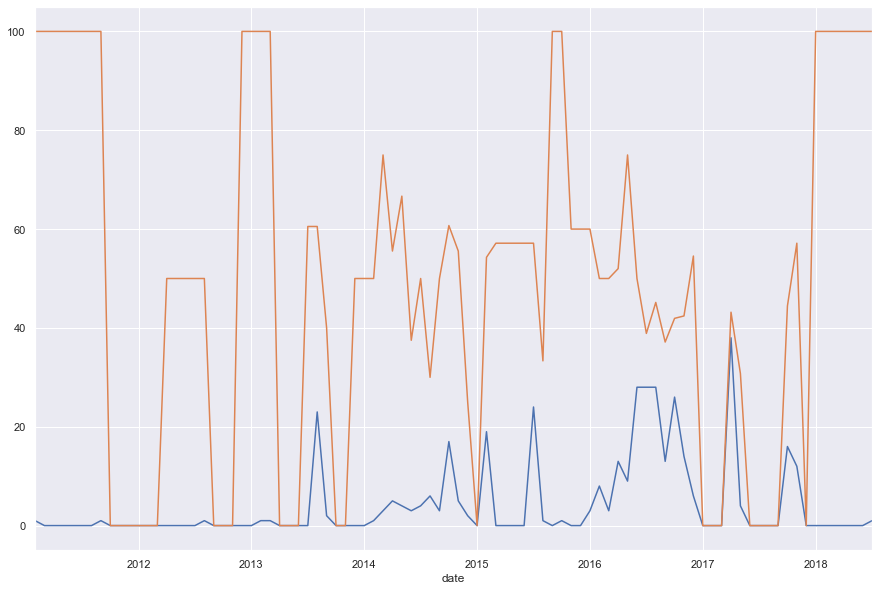

In [14]:
# Percentage fake news artikels per maand
resampled = df.resample("M").size()
display(resampled)
fake_resampled = df[df.labels == 0].resample("M").size()
fake_resampled.plot.line()
percentage = fake_resampled/resampled * 100
percentage.fillna(method="bfill").plot.line()

<AxesSubplot:xlabel='labels'>

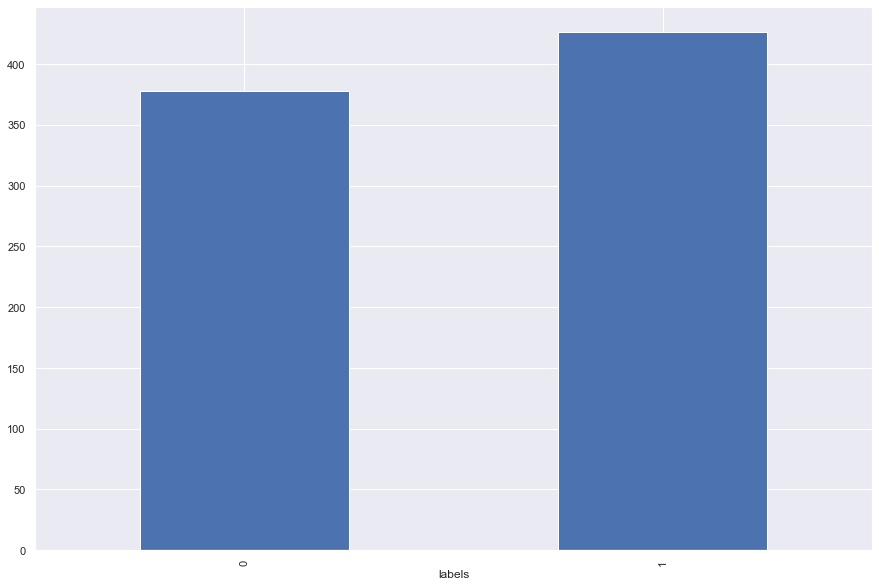

In [15]:
# dataset gebalanceerd
df.groupby("labels").size().plot.bar()

**Antwoorden:**

## Omzetten naar bag of words

Maak nu twee dataframes aan bestaande uit een tekstkolom en een aantal numerieke features:
* Een eerste dataframe met de verwerkte tekst (geen stopwoorden, html tags, enkel letters, ...) van de article_title kolom en het aantal karakters, aantal woorden en het aantal keer dat elke letter voorkomt in de string (alles lowercase) van de article_content_kolom en ten slotte de categorieke kolom met de bron.
* Een tweede dataframe waar de bag-of-words opgebouwd is uit de article_content kolom en het aantal karakters, aantal woorden en het aantal keer dat elke letter voorkomt in de string (alles lowercase) van de article_title_kolom en ten slotte de categorieke kolom met de bron

Let dus op: de tekstkolom is dus nog **niet** omgezet in een feature vector.

Splits daarna beide datset in een train- en testdata. Kies zelf het percentage dat je wil gebruiken.
Hoeveel verschillende woorden zijn er aanwezig in de bag of words van de title en text kolom?

In [38]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split

def process_text(text, min_length=5):
    # remove html
    text = BeautifulSoup(text, 'html.parser').get_text()

    # remove non-letters
    text = re.sub("[^a-zA-Z’]", " ", str(text))

    # to lower-case
    text = text.lower()

    # remove stopwords en stemming
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    stemmer = SnowballStemmer('english')
    
    result = []
    for word in word_tokens:
        if word not in stop_words:
            word = stemmer.stem(word)
            if len(word) >= min_length:
                result.append(word)
            
    return " ".join(result)

# dataframe 1
text = df.article_title.apply(process_text)
df1 = pd.DataFrame({"text":text})
df1["num_chars"] = df.article_content.str.len()
df1["num_words"] = df.article_content.str.split().str.len()

def count_letters(text, letter):
    return text.lower().count(letter)

# letters tellen
for letter in "abcdefghijklmnopqrstuvwxyz":
    df1[letter] = df.article_content.apply(count_letters, args=(letter,))
    
df1["source"] = df.source

display(df1.head())

# dataframe 2
text = df.article_content.apply(process_text)
df2 = pd.DataFrame({"text":text})
df2["num_chars"] = df.article_title.str.len()
df2["num_words"] = df.article_title.str.split().str.len()

def count_letters(text, letter):
    return text.lower().count(letter)

# letters tellen
for letter in "abcdefghijklmnopqrstuvwxyz":
    df2[letter] = df.article_title.apply(count_letters, args=(letter,))
    
df2["source"] = df.source

display(df2.head())
df2.info()

,text,num_chars,num_words,a,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,source
date,,,,,,,,,,,,,,,,,,,,,
2017-04-05,syria attack symptom consist agent,2287,378,204,25,61,83,211,22,29,...,111,172,162,49,19,30,5,39,1,nna
2017-04-07,governor attack death doesnt human,2118,355,193,32,37,74,193,27,38,...,119,150,156,33,17,23,0,30,6,nna
2017-04-16,death aleppo attack least,1447,238,119,32,36,53,149,23,28,...,84,85,96,30,20,23,1,27,0,nna
2017-04-19,aleppo blast syrian state,412,74,34,9,7,16,37,4,2,...,19,24,32,5,6,6,2,7,0,nna
2016-07-10,syria rebel fight aleppo,500,81,36,4,7,16,45,15,9,...,32,27,30,9,4,4,0,13,0,nna


,text,num_chars,num_words,a,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,source
date,,,,,,,,,,,,,,,,,,,,,
2017-04-05,syria attack symptom consist agent victim susp...,57,9,4,0,2,0,5,0,1,...,2,6,7,1,1,2,0,2,0,nna
2017-04-07,governor attack death doesnt human missil stri...,76,13,6,2,2,3,7,0,2,...,2,11,5,4,1,0,0,1,0,nna
2017-04-16,death aleppo attack least death blast crowd sy...,47,9,6,2,1,1,3,1,0,...,1,1,6,0,0,0,0,0,0,nna
2017-04-19,aleppo blast syrian state blast peopl injur sa...,43,8,4,3,0,0,2,0,0,...,1,5,4,0,1,0,1,1,0,nna
2016-07-10,syria rebel fight aleppo least syrian rebel cl...,52,10,4,1,0,3,5,2,2,...,4,2,1,0,0,0,0,2,0,nna


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 804 entries, 2017-04-05 to 2017-04-04
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       804 non-null    object
 1   num_chars  804 non-null    int64 
 2   num_words  804 non-null    int64 
 3   a          804 non-null    int64 
 4   b          804 non-null    int64 
 5   c          804 non-null    int64 
 6   d          804 non-null    int64 
 7   e          804 non-null    int64 
 8   f          804 non-null    int64 
 9   g          804 non-null    int64 
 10  h          804 non-null    int64 
 11  i          804 non-null    int64 
 12  j          804 non-null    int64 
 13  k          804 non-null    int64 
 14  l          804 non-null    int64 
 15  m          804 non-null    int64 
 16  n          804 non-null    int64 
 17  o          804 non-null    int64 
 18  p          804 non-null    int64 
 19  q          804 non-null    int64 
 20  r          80

In [24]:
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(df1, df.labels, test_size=0.2)
X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(df2, df.labels, test_size=0.2)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vect = CountVectorizer()
vect.fit(df1.text)

ValueError: Iterable over raw text documents expected, string object received.

**Antwoorden:**

## Uitvoeren classificatie

Op basis van de bag of words kan je nu classificatie gaan uitvoeren.
Hiervoor gaan we de volgende ensembles gebruiken:
* Random Forest
* StackingEnsemble met een zelf gekozen configuratie
* Bagging met SVM methoden
* AdaBoost met KNN-classifier als basis
* Extreme Gradient Boost

Maak voor elk van deze ensembles een pipeline aan dat de Tfidf-transformer gebruikt om de bag-of-words om te zetten naar een featurevector.
Let op dat de numerieke kolommen niet gebruikt worden in de Tfidf-transformer en zorg ook voor schaling van de numerieke kolommen.
Train deze 5 pijplijnen op zowel de dataset van de title en kolom bag-of-words (in totaal dus 10 trainingen). 
Hier is niet gevraagd gebruik te maken van een gridsearch dus kies zelf een aantal hyperparameters voor elk ensemble dat een goed resultaat geeft.
Sla de accuraatheid, trainingstijd en predicttijd (tijd nodig voor de .predict() functie uit te voeren op de testdata) op voor de 5 pijplijnen op in een dataframe (5 rijen en 6 kolommen dus in totaal).
Toon dit dataframe.

Beantwoord de volgende vragen:
* Voor welke ensembles heeft welke dataset de beste resultaten? (Bvb: Random Forest haalt betere resultaten op de titel- dan op de content-dataset)
* Toon een bar plot van de accuraatheid op train- en testdata met de ensemble technieken op de x-as en twee bars per tick (voor train- en test)
* Welk van de technieken kan het snelst getrained worden? Is dit model ook het snelste voor de predict uit te voeren? Kan je dit verklaren? Verwijs naar de onderliggende estimators en de structuur van het model.
* Welk van de technieken heeft je voorkeur? Verklaar je keuze en verwijs naar de benodigde trainingstijd/accuraatheid.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer

In [44]:
textkolom = Pipeline([
    ("countvec", CountVectorizer()),
    ("tfidf", TfidfTransformer())
])

numerics = df1.select_dtypes("int64").columns
preprocessor= ColumnTransformer([
    ("ordinal_encoder", OrdinalEncoder(), ["source"]),
    ("numerics", StandardScaler(), numerics),
    ("textkolom", textkolom, "text")
])

pipeline1 = Pipeline([
    ("preprocessor", preprocessor) ,
    ("clf", RandomForestClassifier())
])

pipeline1.fit(X_train_df1, y_train_df1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['source']),
                                                 ('numerics', StandardScaler(),
                                                  Index(['num_chars', 'num_words', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
       'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z'],
      dtype='object')),
                                                 ('textkolom',
                                                  Pipeline(steps=[('countvec',
                                                                   CountVectorizer()),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                        

**Antwoorden:**